# Introduction to regression with neural networks in tensorflow

---

There are many definitions for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables even shorter... predicting a number

In [ ]:
# Importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


Creating data to view and fit

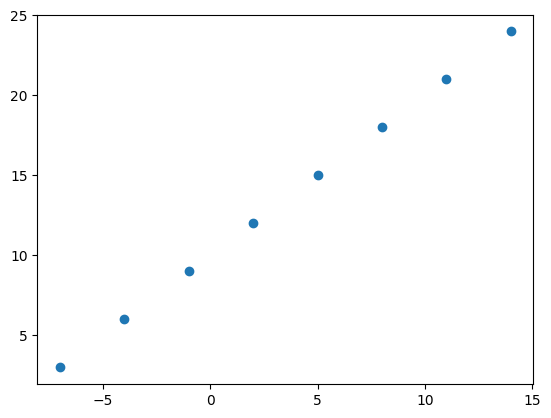

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])  # independent variable

# Create labels

Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])  # dependent variable

# Visulaize it
plt.scatter(X,Y)

In [ ]:
# lets estimate  y = x +10
Y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],Y[0]

(-7.0, 3.0)

In [ ]:
X[0].shape, Y[0].shape

((), ())

In [ ]:
X[0].ndim, Y[0].ndim

(0, 0)

In [ ]:
input_shape = X.shape
output_shape = Y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
"""
## OLD
# Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+

## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line
"""

'\n## OLD\n# Fit the model\nmodel.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+\n\n## New\n# Fit the model\nmodel.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line\n'

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X.shape, Y.shape

(TensorShape([8]), TensorShape([8]))

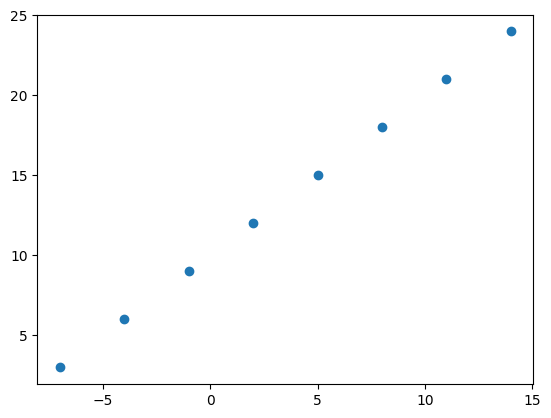

In [ ]:
plt.scatter(X,Y)

**Steps in modelling with Tensorflow**


---


1.   Creating a model
2.   Compiling a model
3.   Fitting a model







In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 244ms/step - loss: 14.7824 - mae: 14.7824
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 14.6499 - mae: 14.6499
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 14.5174 - mae: 14.5174
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 14.3849 - mae: 14.3849
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 14.2524 - mae: 14.2524


***loss = mean(abs(y_true - y_predicted), axis = -1)***

In [ ]:
# Check out X an Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using out model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 47ms/step


array([[-3.2036605]], dtype=float32)

In [ ]:
y_pred + 8

array([[4.7963395]], dtype=float32)

**Improving our model**

---
We can improve ourt model, by altering the steps we took to create a model
1.   **Creating a model** : here we might add more layers, increase the number of hidden layes,(all called neurons) within each of the hidden layers, change the activation function of each layer
2.   **Compiling a model** : here we might change the optimization function or perhaps the **learning rate** of the optimization function
3.   **Fitting the model** : here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)





In [ ]:
# let's rebuild the model
# We try to improve our model by inreasing the epochs

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 250ms/step - loss: 10.1696 - mae: 10.1696
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0371 - mae: 10.0371
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9046 - mae: 9.9046
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7721 - mae: 9.7721
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6396 - mae: 9.6396
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5071 - mae: 9.5071
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3746 - mae: 9.3746
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2421 - mae: 9.2421
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1096 - mae: 9.1096
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9771 - mae: 8.9771
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss:

In [ ]:
# remind ourselves of the data
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# let's see whether our model prediction has improved or not ....
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 56ms/step


array([[30.071318]], dtype=float32)

In [ ]:
# let's rebuild the model to again improve the our model
# We try to improve our model by adding ean extra hidden layer with 100 neurons (hidden units)

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 12.3078 - mae: 12.3078
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6375 - mae: 11.6375
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9628 - mae: 10.9628
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2684 - mae: 10.2684
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5493 - mae: 9.5493
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7992 - mae: 8.7992
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.0099 - mae: 8.0099
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.1724 - mae: 7.1724
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.2880 - mae: 6.2880
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.3428 - mae: 5.3428
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - lo

In [ ]:
# Let's remind ourselves our data
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# let's make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 50ms/step


array([[32.487034]], dtype=float32)

In [ ]:
# according to above result, we have overfitting because our real predicted value error is not compatible with fit error message

**Evaluating a model**

*   When it comes to evaluation... there are 3 words you should memorize " Visualize","Visualize", "Visualize".

*   ıt is a good idea to visualize the data, model, training, predictions,



In [ ]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the data set
Y = X +10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

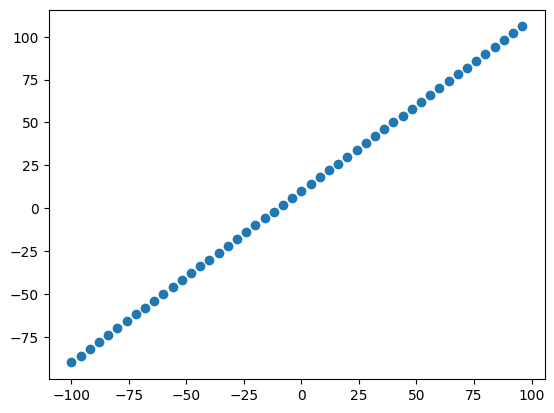

In [ ]:
# Let's visualize the data
plt.scatter(X,Y)

**The 3 sets split the data**

1.   **Training set** : model learns from this data, which is typically 70 - 80 % of the total data you have available
2.   **Validation set** : the model gets tuned on this data, which is 10 - 15 % of the data
3.   **Test set** : the model gets evaluated on this data to test what is has learned, this set is typically 10 - 15 % of the total data available.



In [ ]:
# Check the length of the data
len(X)

50

In [ ]:
# split the data into train and test
X_train = X[:40] #first  40 are training samples (80 % of the data)
Y_train = Y[:40]
X_test = X[40:] # last 20 are testing samples ( 20 % of the data)
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

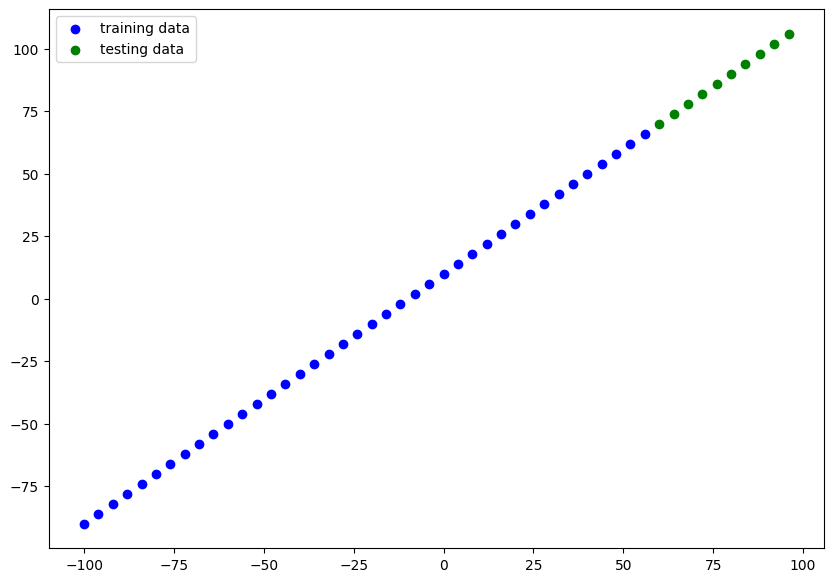

In [ ]:
# let's visualize the data
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train,Y_train, c = "b", label ="training data")
# Plot testing data in green
plt.scatter(X_test, Y_test, c="g", label = "testing data")
# show a legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# Create a model
model = tf.keras.Sequential([

    tf.keras.layers.Dense(1),


])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# fit the model
# model.fit(tf.expand_dims(X_train,axis = 1),Y_train,epochs=100)


In [ ]:
#model.summary()  # we get error because we did not specify the input shape or we didnot build or fit the model

In [ ]:
# Let's create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1],name = "input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],
name = "model_1"
)

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
             )


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Dense means all fully connected layer


*   **Total params :** total number of parameters in the model
*   **Trainable parameters :** these are the parameters (patterns) the model can update as it trains
*   **Non-trainable params :** these parameters are not updated during the training (this is typical when you have parameters from other models during **transfer learning**)



In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100, verbose=0)

In [ ]:
# Call a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


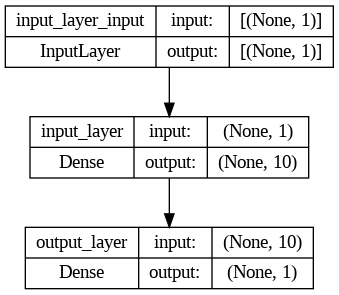

In [ ]:
# visualize the model

from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes= True)

**Visualizng our predictions**

--- To visualize predictions, it is a good idea to plot them against the ground truth tables



In [ ]:
# make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 42ms/step


array([[34.898613],
       [37.128532],
       [39.358456],
       [41.58838 ],
       [43.8183  ],
       [46.04822 ],
       [48.278145],
       [50.508068],
       [52.73799 ],
       [54.967915]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# let's create a plotting function
def plot_predictions (train_data = X_train,
                      train_label = Y_train,
                      test_data = X_test,
                      test_label = Y_test,
                      predictions = y_preds):
  """
  plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize = (10,7))

  # plot training data in blue
  plt.scatter(train_data, train_label, c= "b", label = "Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label = "Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")

  # show the legend
  plt.legend();


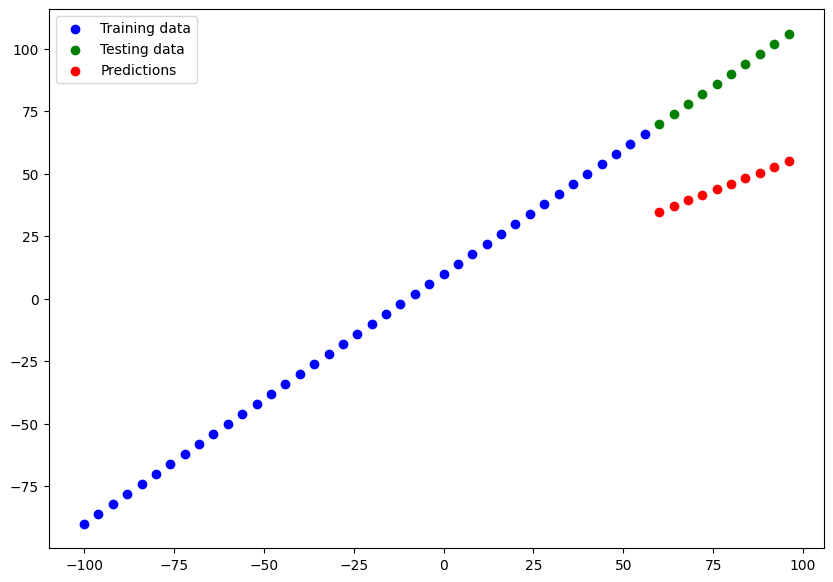

In [ ]:
plot_predictions()

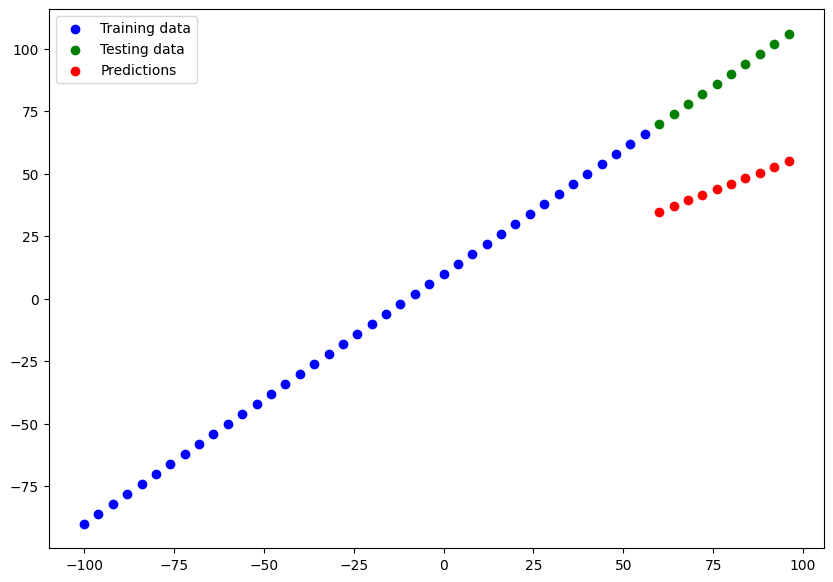

In [ ]:
plot_predictions(train_data = X_train,
                 train_label = Y_train,
                 test_data = X_test,
                 test_label = Y_test,
                 predictions = y_preds)

**Evaluating our models predictions with regression evaluation metrics**

---

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your modles performance.

*  Since we are working on a regression, two of the main metric:
1.  **MAE :** mean absolute error, "on average, how wrong is each of my models predictions".
2.  **MSE :** mean squared error, "sqaure the average errors"

In [ ]:
# Evaluate the model on the test data
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 89ms/step - loss: 43.0667 - mae: 43.0667


[43.066734313964844, 43.066734313964844]

In [ ]:
y_preds

array([[34.898613],
       [37.128532],
       [39.358456],
       [41.58838 ],
       [43.8183  ],
       [46.04822 ],
       [48.278145],
       [50.508068],
       [52.73799 ],
       [54.967915]], dtype=float32)

In [ ]:
# Calculate the mean absolute errror
mae = tf.metrics.mean_absolute_error(Y_test,y_preds)
mae
# the result is not as we want because Y_test and y_preds have different shapes, y_preds has extra dimension Therefore we need to squueze the y_preds

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.101387, 50.871468, 48.641544, 46.41162 , 44.1817  , 41.95178 ,
       39.721855, 37.491932, 35.26201 , 33.032085], dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(Y_test,tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.06674>

In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(Y_test, y_preds)
mse
# the result is not as we want because Y_test and y_preds have different shapes, y_preds has extra dimension Therefore we need to squueze the y_preds

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2951.7573, 2719.9062, 2497.9995, 2286.0386, 2084.0227, 1891.9515,
       1709.8258, 1537.6449, 1375.4093, 1223.1187], dtype=float32)>

In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1880.5925>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred= tf.squeeze(y_preds))

def mse(y_true, y_preds):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_preds))


**Running experiments to improve our model**

1. Get more data : get more example for your model to train on (more opportunities to learn patterns or relationships betweenfeatures and labels).
2. Make your model larger (using a more complex model) : this might come in the form of more layers or more hiden units in each layer.
3. Train for longer : give your model more of a chance to find patterns in the data.

* Lets do 3 modelling experiments
1. same as the original model_1 1 layer trained for 100 epochs
2. model_2 2 layers trained for 100 epochs
3. model_3 2 layers trained for 500 epochs

In [ ]:
X_train,
Y_train


<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66], dtype=int32)>

**BUILD MODEL_1**

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model
model_1.fit(tf.expand_dims(X_train,axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 108.8313 - mae: 108.8313
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 73.3758 - mae: 73.3758
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 35.8259 - mae: 35.8259
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5967 - mae: 7.5967
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0709 - mae: 12.0709
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3455 - mae: 9.3455
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5039 - mae: 8.5039
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0693 - mae: 9.0693
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.5251 - mae: 18.5251
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.0111 - mae: 10.0111
Epoch 11/100
2/2 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 31ms/step


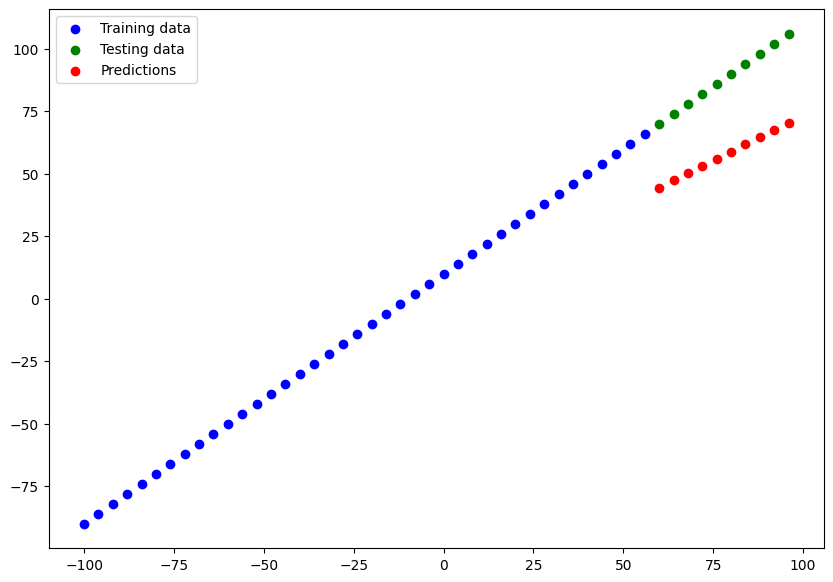

In [ ]:
# make and plot some predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test,y_preds_1)
mse_1 = mse(Y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.54918>,
 <tf.Tensor: shape=(), dtype=float32, numpy=943.58435>)

**BUILD MODEL_2**
* 2 dense layers, trained for 100 epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"]
                )

# fit the model
model_2.fit(tf.expand_dims(X_train,axis = -1),Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 35.1263 - mse: 1709.7930
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 28.2728 - mse: 1042.2858
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 33.3403 - mse: 1668.5573
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.7184 - mse: 1128.5546
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.1049 - mse: 288.4368
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0086 - mse: 174.3810
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3247 - mse: 155.2456
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1567 - mse: 166.6083
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.1049 - mse: 2678.7021
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.4149 - mse: 1139.2998
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 66ms/step


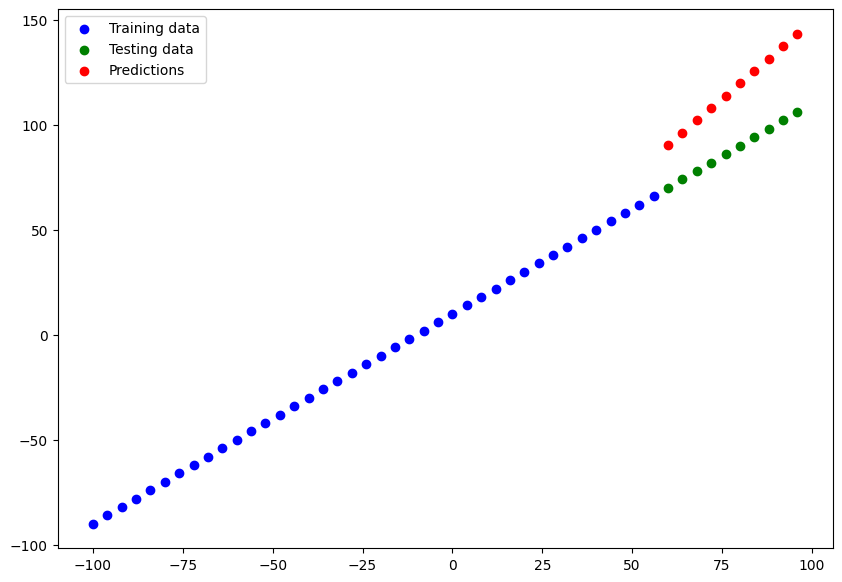

In [ ]:
# Make and plot predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# Calculate model_2 evaluation mmetrics
mae_2 = mae(Y_test,y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=28.753742>,
 <tf.Tensor: shape=(), dtype=float32, numpy=856.4215>)

**BUILD MODEL_3**
* 2 layers trained for 500 epochs


In [ ]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]
                )
# fit the model
model_3.fit(tf.expand_dims(X_train,axis = -1),Y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 41.8659 - mae: 41.8659
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 31.7297 - mae: 31.7297
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 35.5168 - mae: 35.5168
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 22.8153 - mae: 22.8153
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 13.7232 - mae: 13.7232
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0975 - mae: 11.0975
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 12.1484 - mae: 12.1484
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.9674 - mae: 10.9674
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 38.3274 - mae: 38.3274
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 25.8633 - mae: 25.8633
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 58ms/step


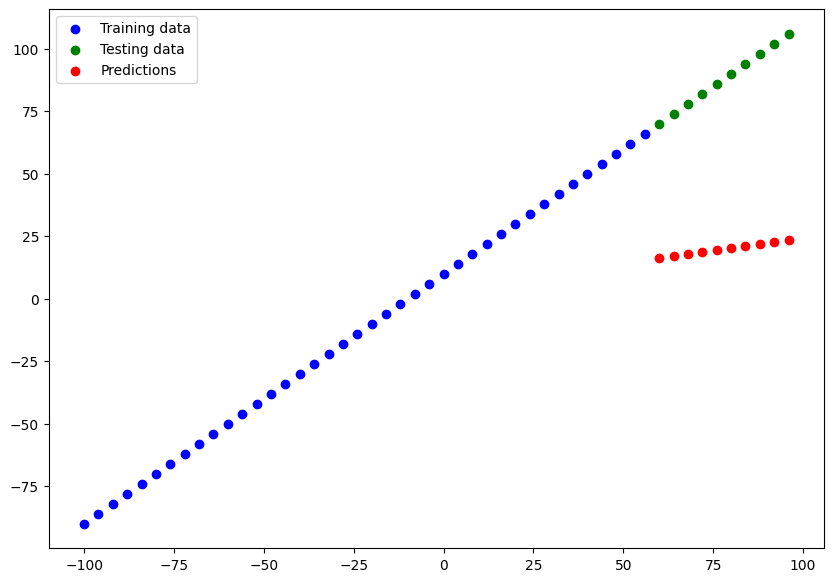

In [ ]:
# make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

**AS IT CAN BE SEEN ABOVE WITH MORE EPOCHS OUR MODEL IS OVERFITTED**

In [ ]:
# calculate model_3 evaluation metrics
mae_3 = mae(Y_test,y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.0827>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4720.0283>)

**Comparing the results of our experiments**
* We have run o few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["Model_1",mae_1.numpy(),mse_1.numpy()],
                ["Model_2",mae_2.numpy(),mse_2.numpy()],
                ["Model_3",mae_3.numpy(),mse_3.numpy()]
               ]

all_results = pd.DataFrame(model_results, columns = ["model","mae","mse"])
all_results
# looks like model_2 is better

,model,mae,mse
0,Model_1,30.549179,943.584351
1,Model_2,28.753742,856.421509
2,Model_3,68.082703,4720.028320


In [ ]:
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Tracking your experience**
* One really good habit in machine learning is to track the results of your experience
and when doing do, it can be tedious, if you are running lots of experiments
* However, there are tools to help us
1. Tensorboard a component of the Tensorflow library to help track modelling experiments
2. Weights and Biases a tool for tracking all of kinds of machine learning experiments

**Saving our trained models**
* Saving our models allow us to use them outside of the Google Colab (or wherever they were trained) such as in a web application or mobile app.
* There are two main forms we can save our model's too :
1. The SavedModel format
2. The HDF5 format

In [ ]:
# save a model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

**Loading Saved Model**

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# let's check whether model_2 saved correctly or not
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format predicitions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 56ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h2 format
loaded_h5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")

In [ ]:
loaded_h5_format.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with h5 format predicitions
loaded_h5_format_preds = loaded_h5_format.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [ ]:
loaded_h5_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

**Download a model (or any other file f) from Google Colab
* If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file tou are after and click "download".
2. We can use code
3. You can save it to google drive and then download from drive

In [ ]:
# Download a file from Google Colab
from google.colab import files
#files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a file from google colab to google drive (requires mounting google drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Data

In [ ]:
!ls /content/drive/MyDrive/Data

 best_model_HDF5_format.h5  'CAR DETAILS FROM CAR DEKHO.csv'


**A larger Example**

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# let's try one-hot encode our DataFrame so it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and Y values (features and labels)
X = insurance_one_hot.drop("charges",axis = 1)
Y = insurance_one_hot["charges"]

In [ ]:
# view X  and Y
X.head(), Y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
# create training and test sets for us to done this we can use scikit_learn python library
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)
# random_satate help rows to be exchnged (shuffled)

(1338, 1070, 268)

In [ ]:
# build a neural network (sort of like model_2 above)
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# fit the model
insurance_model.fit(tf.expand_dims(X_train,axis = -1),Y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13183.9326 - mae: 13183.9326
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12263.8369 - mae: 12263.8369
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12168.5107 - mae: 12168.5107
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12091.7695 - mae: 12091.7695
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11973.3076 - mae: 11973.3076
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11779.7207 - mae: 11779.7207
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11442.0430 - mae: 11442.0430
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 10918.1328 - mae: 10918.1328
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 10299.8809 - mae: 10299.8809
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 9656.726

In [ ]:
# check the results of the insurance model on the test data
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8919.8213 - mae: 8919.8213


[8919.8212890625, 8919.8212890625]

In [ ]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model is not performing too well... let's try and improve it
* To try to improve our model we will run 2 experiments
1. Add an extra layer with more hidden units and use adam optimizer
2. Train for longer
3. (insert your own experiment here)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the modeli
insurance_model_2.compile( loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["mae"]
)

# fit the model
insurance_model_2.fit(X_train,Y_train,epochs =  100, verbose = 1) # doing like this seems more logical instead of expand dims

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13290.4395 - mae: 13290.4395
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13127.6172 - mae: 13127.6172
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12786.0420 - mae: 12786.0420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12110.3203 - mae: 12110.3203
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10974.5742 - mae: 10974.5742
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9518.9785 - mae: 9518.9785
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8179.6440 - mae: 8179.6440
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7530.6660 - mae: 7530.6660
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7422.8984 - mae: 7422.8984
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7402.3545 - mae:

In [ ]:
# evaluate the larger model
insurance_model_2.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.3701 - mae: 4924.3701


[4924.3701171875, 4924.3701171875]

In [ ]:
# evaluate old model
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8919.8213 - mae: 8919.8213


[8919.8212890625, 8919.8212890625]

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"]
                          )

# fit the model
history = insurance_model_3.fit(X_train,Y_train,epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13292.9238 - mae: 13292.9238
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13127.8350 - mae: 13127.8350
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12793.2920 - mae: 12793.2920
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12132.7236 - mae: 12132.7236
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11013.5332 - mae: 11013.5332
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9560.3594 - mae: 9560.3594
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8212.7383 - mae: 8212.7383
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7544.2251 - mae: 7544.2251
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.2339 - mae: 7429.2339
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7407.8608 - mae:

In [ ]:
# evaluate our third model
insurance_model_3.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3488.6787 - mae: 3488.6787


[3488.6787109375, 3488.6787109375]

In [ ]:
# evalueate old model
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8919.8213 - mae: 8919.8213


[8919.8212890625, 8919.8212890625]

Text(0.5, 0, 'epochs')

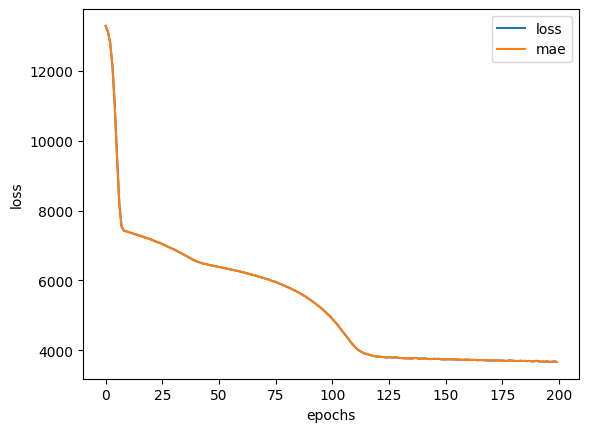

In [ ]:
# Plot history (also known as  a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

* How long should you train for ?

--> It depends on the problem you are working on. However, Tesnorfloe has a solution. it is called the EarlyStopping Callback which is a tensorflow component you can add your model to stop training once it stops improving a certain metric

**Preprocessing data (Normalization and standardization)**

---
In terms of scaling values, neural networks tend to prefer normalization
* if you are not sure on which to use, you could try bıth and see which performs better



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex","smoker","region"])
)

# Create X and Y
X = insurance.drop("charges",axis = 1)
Y = insurance["charges"]

# split the data
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

# fit the column transformer to our training data
ct.fit(X_train)

# transfrom training and testing data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Beatiful aour data has been normalized and one hot encoded Now, let's build a neural network model on it and see how it goes

In [ ]:
# Build a neural network model to fir on your normalized data4
tf.random.set_seed(42)

# create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"]
                          )

# fit the model
insurance_model_4.fit(X_train_normal, Y_train,epochs=100,verbose = 0)

In [ ]:
# evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3436.9917 - mae: 3436.9917


[3436.99169921875, 3436.99169921875]

<Axes: ylabel='Frequency'>

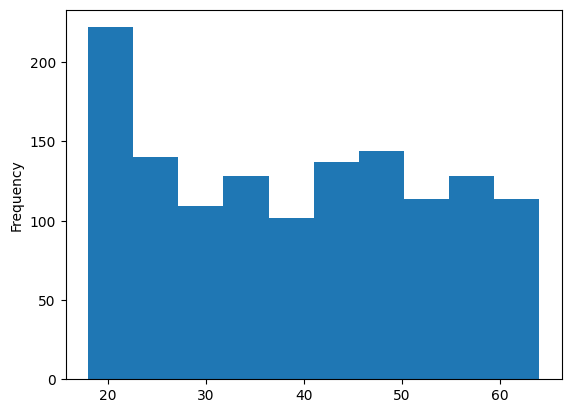

In [ ]:
X["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

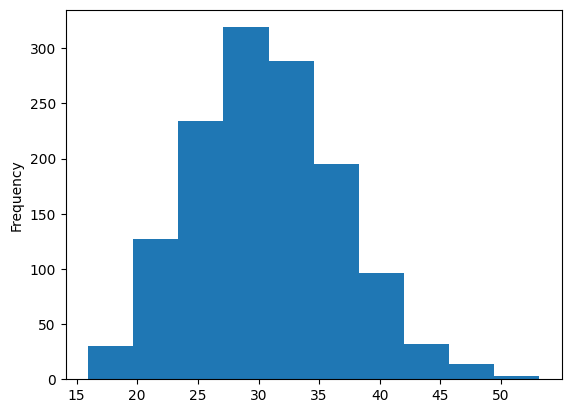

In [ ]:
X["bmi"].plot(kind = "hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

**LET'S MAKE AN EXAMPLE PROJECT FROM KAGGLE VEHICLE DATASET**

In [ ]:
vehicle = pd.read_csv("/content/drive/MyDrive/Data/CAR DETAILS FROM CAR DEKHO.csv")
vehicle
vehicle = vehicle.iloc[:1500]
vehicle = vehicle.drop("seller_type",axis = 1)
vehicle = vehicle.drop("owner",axis = 1)
vehicle


,name,year,selling_price,km_driven,fuel,transmission
0,Maruti 800 AC,2007,60000,70000,Petrol,Manual
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Manual
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Manual
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Manual
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Manual
...,...,...,...,...,...,...
1495,Maruti Omni MPI STD BSIV,2014,150000,120000,Petrol,Manual
1496,Tata Indica Vista Quadrajet LX,2011,149000,10000,Diesel,Manual
1497,Tata Indica Vista Aqua 1.3 Quadrajet,2011,160000,80000,Diesel,Manual
1498,Datsun GO Plus T Option Petrol,2018,434999,10000,Petrol,Manual


In [ ]:
# first we need to import necessary libraries for training, reading data, splitting data, normalization data
import tensorflow as tf
import pandas as pd
import numpy as np

# this libraries is used to normalize the data and split the data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transfromer
ct = make_column_transformer(
    (MinMaxScaler(), ["year","km_driven"] ), # turn this numerical values by normalizing betweem 0 and 1
     (OneHotEncoder(handle_unknown = "ignore"), ["name","fuel","transmission"])
)

# let's create the dataset into X and Y for training
x = vehicle.drop("selling_price",axis = 1)
y = vehicle["selling_price"]

In [ ]:
# let visualize the features
x

,name,year,km_driven,fuel,transmission
0,Maruti 800 AC,2007,70000,Petrol,Manual
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Manual
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Manual
3,Datsun RediGO T Option,2017,46000,Petrol,Manual
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Manual
...,...,...,...,...,...
1495,Maruti Omni MPI STD BSIV,2014,120000,Petrol,Manual
1496,Tata Indica Vista Quadrajet LX,2011,10000,Diesel,Manual
1497,Tata Indica Vista Aqua 1.3 Quadrajet,2011,80000,Diesel,Manual
1498,Datsun GO Plus T Option Petrol,2018,10000,Petrol,Manual


In [ ]:
# let visualize the labels
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
1495    150000
1496    149000
1497    160000
1498    434999
1499    800000
Name: selling_price, Length: 1500, dtype: int64

In [ ]:
# let's split the data training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# let's fit the columns transformer to our training data
ct.fit(x_train)

# transform training and testing data with normalization
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [ ]:
# let's visualize the normalized data
x_train.loc[0]

name            Maruti 800 AC
year                     2007
km_driven               70000
fuel                   Petrol
transmission           Manual
Name: 0, dtype: object

In [ ]:
x_train.shape

(1200, 5)

In [ ]:
x_train_normal.shape

(1200, 702)

In [ ]:
x_train.loc[0]

name            Maruti 800 AC
year                     2007
km_driven               70000
fuel                   Petrol
transmission           Manual
Name: 0, dtype: object

In [ ]:
x_train_normal=x_train_normal.toarray()
x_train_normal[0]

array([0.96      , 0.02504472, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# buid a neural network for our vehicle dataset

# set random seed
tf.random.set_seed(42)

# create the model
vehicle_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compile the model
vehicle_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# fit the model
vehicle_model.fit(x_train_normal,y_train,epochs = 200)

Epoch 1/200
38/38 [==============================] - 1s 2ms/step - loss: 546467.0000 - mae: 546467.0000
Epoch 2/200
38/38 [==============================] - 0s 2ms/step - loss: 546456.8125 - mae: 546456.8125
Epoch 3/200
38/38 [==============================] - 0s 2ms/step - loss: 546429.6250 - mae: 546429.6250
Epoch 4/200
38/38 [==============================] - 0s 2ms/step - loss: 546373.1875 - mae: 546373.1875
Epoch 5/200
38/38 [==============================] - 0s 2ms/step - loss: 546276.0000 - mae: 546276.0000
Epoch 6/200
38/38 [==============================] - 0s 2ms/step - loss: 546126.2500 - mae: 546126.2500
Epoch 7/200
38/38 [==============================] - 0s 2ms/step - loss: 545912.6250 - mae: 545912.6250
Epoch 8/200
38/38 [==============================] - 0s 2ms/step - loss: 545624.1250 - mae: 545624.1250
Epoch 9/200
38/38 [==============================] - 0s 2ms/step - loss: 545249.9375 - mae: 545249.9375
Epoch 10/200
38/38 [==============================] - 0s 2ms/ste

In [ ]:
x_test_normal=x_test_normal.toarray()
vehicle_model.evaluate(x_test_normal,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 271348.3438 - mae: 271348.3438


[271348.34375, 271348.34375]

**LET'S MAKE ANOTHER EXAMPLE REGRESSION EXAMPLE PROJECT**
*